# Notebook to plot the helicity angles of $a_{0}$

In [3]:
import ROOT
import numpy as np
import my_library.common_analysis_tools as ct
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts
import pandas as pd

Welcome to JupyROOT 6.24/04


In [4]:
def get_gamma_cm(ey: float, s: float) -> float:
    # type: (float, float) -> float
    return (ey + 0.938272)/np.sqrt(s)
# def get_gamma_cm(ey, s):
#     return (ey + 0.938272)/np.sqrt(s)

def get_beta_cm(ey: float) -> float:
    return ey/(ey + 0.938272)


def get_beta(p: float, e: float) -> float:
    return p/e


def get_gamma(e: float, m: float) -> float:
    return e/m


In [5]:
def get_cm_vector(e: float, px: float, py: float, pz: float, ey: float, s: float):
    gamma = get_gamma_cm(ey, s)
    beta = get_beta_cm(ey)
    vec_cm_rotaton = np.array([[gamma, 0, 0, -1*beta*gamma],
                     [0, 1, 0, 0],
                     [0, 0, 1, 0],
                     [-1*beta*gamma, 0, 0, gamma]])
    vec_lab = np.array([e, px, py, pz]).reshape(4,1)
    return (vec_cm_rotaton @ vec_lab).reshape(1,4)


In [6]:
def get_rest_frame_vec(p4_decay_cm, p4_rest_cm, m_rest: float):
    """e in 0th element, px in 1st, py in 2nd, pz in 3rd"""
    p4_decay_cm   = p4_decay_cm.flatten()
    p4_rest_cm    = p4_rest_cm.flatten()
    beta = get_beta(np.sqrt(p4_rest_cm[1]*p4_rest_cm[1] + p4_rest_cm[2]*p4_rest_cm[2] + p4_rest_cm[3]*p4_rest_cm[3]), p4_rest_cm[0])
    gamma = get_gamma(p4_rest_cm[0], m_rest)
    beta_x = get_beta(p4_rest_cm[1], p4_rest_cm[0])
    beta_y = get_beta(p4_rest_cm[2], p4_rest_cm[0])
    beta_z = get_beta(p4_rest_cm[3], p4_rest_cm[0])

    p4_decay_cm = p4_decay_cm.reshape(-1, 1)

    rest_rotation = np.array([[gamma,         -gamma*beta_x,                             -gamma*beta_y,                             -gamma*beta_z                            ],
                              [-gamma*beta_x, 1 + (gamma - 1)*beta_x*beta_x/(beta*beta), (gamma - 1)*beta_x*beta_y/(beta*beta),     (gamma - 1)*beta_x*beta_z/(beta*beta)    ],
                              [-gamma*beta_y, (gamma - 1)*beta_y*beta_x/(beta*beta),     1 + (gamma - 1)*beta_y*beta_y/(beta*beta), (gamma - 1)*beta_y*beta_z/(beta*beta)    ],
                              [-gamma*beta_z, (gamma - 1)*beta_z*beta_x/(beta*beta),     (gamma - 1)*beta_z*beta_y/(beta*beta),     1 + (gamma - 1)*beta_z*beta_z/(beta*beta)]])

    return (rest_rotation @ p4_decay_cm).reshape(1, -1)

In [20]:
def get_y_hat(beam_cm_p4, m_cm_p4):
    beam_cm_p4 = beam_cm_p4.flatten()[1:]
    m_cm_p4 = m_cm_p4.flatten()[1:]
    cross_product = np.cross(beam_cm_p4, m_cm_p4)
    return cross_product/np.linalg.norm(cross_product)

def get_z_hat(m_cm_p4):
    p4_m_cm = m_cm_p4.flatten()[1:]
    return p4_m_cm/np.linalg.norm(p4_m_cm)

def get_x_hat(y_hat, z_hat):
    cross_product = np.cross(y_hat, z_hat)
    return cross_product/np.linalg.norm(cross_product)

def get_helicity_p3(decay_rest_p4, xhat, yhat, zhat):
    decay_rest_p4 = decay_rest_p4.flatten()[1:]
    return np.array([decay_rest_p4.dot(xhat), decay_rest_p4.dot(yhat), decay_rest_p4.dot(zhat)])

def cos_theta_helicty(p3_helicity):
    return p3_helicity[2]/np.linalg.norm(p3_helicity)

def phi_helicity(p3_helicity):
    return np.arctan2(p3_helicity[1], p3_helicity[0])

In [8]:
rdf_pipkmks = ct.get_dataframe('pipkmks', 'spring', 'data')
rdf_pipkmks = rdf_pipkmks.Define('kk_E', 'km_E + ks_E')
rdf_pipkmks = rdf_pipkmks.Define('kk_px', 'km_px + ks_px')
rdf_pipkmks = rdf_pipkmks.Define('kk_py', 'km_py + ks_py')
rdf_pipkmks = rdf_pipkmks.Define('kk_pz', 'km_pz + ks_pz')
rdf_pipkmks = rdf_pipkmks.Define('kk_m', 'sqrt(kk_E*kk_E - kk_px*kk_px - kk_py*kk_py - kk_pz*kk_pz)')
np_pipkmks = rdf_pipkmks.AsNumpy()

In [9]:
df_pipkmks = pd.DataFrame(np_pipkmks)

In [10]:
print(df_pipkmks.head().to_markdown())

|    |    kk_E |     kk_px |      kk_py |   kk_pz |    kk_m |     p_pt |      p_p |      ks_px |      ks_py |   ks_pz |    ks_E |     ks_m |   ks_px_measured |   ks_py_measured |   ks_pz_measured |   ks_E_measured |   ks_m_measured |   mxpx_ppipkmks |   mxpy_ppipkmks |   mxpz_ppipkmks |   mxe_ppipkmks |   mx2_ppipkmks |   ppip_px |    ppip_py |   ppip_pz |   ppip_E |   ppip_m |   missing_px |   missing_py |   missing_pz |    missing_E |   missing_m |    kmp_px |     kmp_py |   kmp_pz |   kmp_E |   kmp_m |    ksp_px |     ksp_py |   ksp_pz |   ksp_E |   ksp_m |   kspip_px |   kspip_py |   kspip_pz |   kspip_E |   kspip_m |   kmpip_px |   kmpip_py |   kmpip_pz |   kmpip_E |   kmpip_m |   pipkmks_px |   pipkmks_py |   pipkmks_pz |   pipkmks_E |   pipkmks_px_measured |   pipkmks_py_measured |   pipkmks_pz_measured |   pipkmks_pt |   pipkmks_p_pt_diff |   pipkmks_m |   kmks_px |    kmks_py |   kmks_pz |   kmks_E |   kmks_m |   e_bin |   t_bin |   run |    event |   trigbits | rftime   |   k

In [11]:
df_pipkmks['gamma_cm'] = get_gamma_cm(df_pipkmks['e_beam'], df_pipkmks['s'])
df_pipkmks['beta_cm'] = get_beta_cm(df_pipkmks['e_beam'])
df_pipkmks['km_cm_p4'] = df_pipkmks.apply(lambda x: get_cm_vector(x['km_E'], x['km_px'], x['km_py'], x['km_pz'], x['e_beam'], x['s']), axis=1)
df_pipkmks['pip1_cm_p4'] = df_pipkmks.apply(lambda x: get_cm_vector(x['pip1_E'], x['pip1_px'], x['pip1_py'], x['pip1_pz'], x['e_beam'], x['s']), axis=1)
df_pipkmks['ks_cm_p4'] = df_pipkmks.apply(lambda x: get_cm_vector(x['ks_E'], x['ks_px'], x['ks_py'], x['ks_pz'], x['e_beam'], x['s']), axis=1)
df_pipkmks['p_cm_p4'] = df_pipkmks.apply(lambda x: get_cm_vector(x['p_E'], x['p_px'], x['p_py'], x['p_pz'], x['e_beam'], x['s']), axis=1)
df_pipkmks['beam_cm_p4'] = df_pipkmks.apply(lambda x: get_cm_vector(x['e_beam'], 0, 0, x['e_beam'], x['e_beam'], x['s']), axis=1)
df_pipkmks['target_cm_p4'] = df_pipkmks.apply(lambda x: get_cm_vector(0.938272, 0, 0, 0, x['e_beam'], x['s']), axis=1)
df_pipkmks['kk_cm_p4'] = df_pipkmks.apply(lambda x: get_cm_vector(x['kk_E'], x['kk_px'], x['kk_py'], x['kk_pz'], x['e_beam'], x['s']), axis=1)

In [12]:
df_pipkmks['pipkmks_cm_p4'] = df_pipkmks.apply(lambda x: get_cm_vector(x['pipkmks_E'], x['pipkmks_px'], x['pipkmks_py'], x['pipkmks_pz'], x['e_beam'], x['s']), axis=1)

In [13]:
df_pipkmks['kk_rest_p4'] = df_pipkmks.apply(lambda x: get_rest_frame_vec(x['kk_cm_p4'], x['pipkmks_cm_p4'], 1.282), axis=1)

In [16]:
df_pipkmks['y_hat'] = df_pipkmks.apply(lambda x: get_y_hat(x['beam_cm_p4'], x['pipkmks_cm_p4']), axis=1)
df_pipkmks['z_hat'] = df_pipkmks.apply(lambda x: get_z_hat(x['pipkmks_cm_p4']), axis=1)
df_pipkmks['x_hat'] = df_pipkmks.apply(lambda x: get_x_hat(x['y_hat'], x['z_hat']), axis=1)

In [17]:
df_pipkmks['kk_helicty_p3'] = df_pipkmks.apply(lambda x: get_helicity_p3(x['kk_rest_p4'], x['x_hat'], x['y_hat'], x['z_hat']), axis=1)

In [19]:
df_pipkmks['kk_cos_theta_helicty'] = df_pipkmks.apply(lambda x: cos_theta_helicty(x['kk_helicty_p3']), axis=1)

In [21]:
df_pipkmks['kk_phi_helicty'] = df_pipkmks.apply(lambda x: phi_helicity(x['kk_helicty_p3']), axis=1)

In [25]:
cos_theta_helicty = df_pipkmks.kk_cos_theta_helicty.to_numpy()
phi_helicty = df_pipkmks.kk_phi_helicty.to_numpy()

In [26]:
rdf_helicty = ROOT.RDF.MakeNumpyDataFrame({'cos_theta_helicty': cos_theta_helicty, 'phi_helicty': phi_helicty})

In [31]:
hist_cos_theta = rdf_helicty.Histo1D(('cos_theta_helicty', 'cos_theta_helicty', 220, -1.1, 1.1), 'cos_theta_helicty')

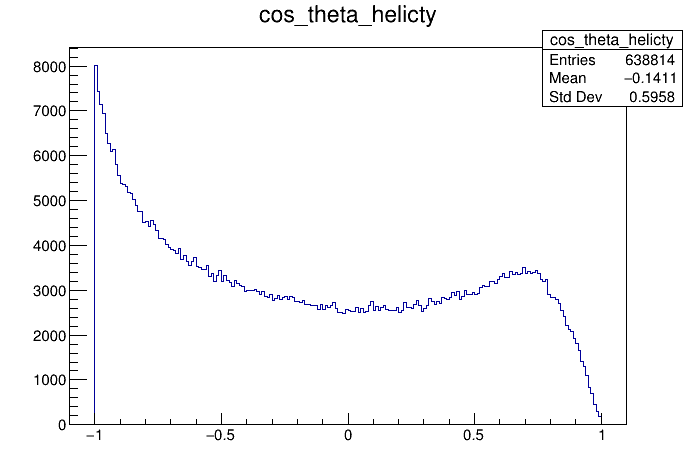

In [32]:
c = ROOT.TCanvas()
hist_cos_theta.Draw()
c.Draw()